In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE

In [2]:
pd.set_option("display.max_columns",None)
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# Checking shape of data

In [4]:
df.shape

(1000, 40)

# Checking information about data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

- _c39 has null values except _c39 column all column has proper values

# Checking for null values

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

- _c39 columns has all null values so we can drop this column

In [7]:
df.drop("_c39",axis=1,inplace=True)

# Checking for duplicate values

In [8]:
df.duplicated().sum()

0

data has no duplicate value

# Checking how data looks mathematically

In [9]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000



Observation:

1-Policy_deductable,injury_claim,property_claim are right skewed because mean value is greater than median value.

2-Months_as_customer,umbrella_limit,capital_gains,injury_claim,property_claim contain zero as a miminum values.

3-Vehicle_claim,total_claim_amount,captial_gains are left skewed in nature.

In [10]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [11]:
df.drop(["policy_number", "incident_location"], axis=1, inplace=True)


Dropped Policy_number and incident_location because these columns has 1000 unique values

In [12]:
num_var = []
cat_var = []

for i in df.columns:
    if df[i].dtype == "O":
        cat_var.append(i)
    else:
        num_var.append(i)

In [13]:
df[cat_var].nunique().to_frame("Unique Values")

,Unique Values
policy_bind_date,951
policy_state,3
policy_csl,3
insured_sex,2
insured_education_level,7
insured_occupation,14
insured_hobbies,20
insured_relationship,6
incident_date,60
incident_type,4


In [14]:
df[num_var].nunique().to_frame("Unique Values")

,Unique Values
months_as_customer,391
age,46
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995
capital-gains,338
capital-loss,354
incident_hour_of_the_day,24
number_of_vehicles_involved,4


# Feature Engineering

In [15]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['policy_bind_Day'] = df["policy_bind_date"].dt.day
df['policy_bind_Month'] = df["policy_bind_date"].dt.month
df['policy_bind_year'] = df["policy_bind_date"].dt.year

In [16]:
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['incident_Day'] = df['incident_date'].dt.day
df['incident_Month'] = df['incident_date'].dt.month
df['incident_Year'] = df['incident_date'].dt.year

In [17]:
df.drop(columns = ['policy_bind_date','incident_date'], axis=1, inplace=True)

In [18]:
df['collision_type'] = df['collision_type'].replace('?', 'Not Defined')
df['property_damage'] = df['property_damage'].replace('?', 'Not Defined')
df['police_report_available'] = df['police_report_available'].replace('?', 'Not Defined')

In [19]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Day,policy_bind_Month,policy_bind_year,incident_Day,incident_Month,incident_Year
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,17,10,2014,25,1,2015
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Not Defined,Minor Damage,Police,VA,Riverwood,8,1,Not Defined,0,0,Not Defined,5070,780,780,3510,Mercedes,E400,2007,Y,27,6,2006,21,1,2015
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,9,6,2000,22,2,2015
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,Not Defined,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,25,5,1990,1,10,2015
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Not Defined,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,6,6,2014,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,20,1,YES,0,1,Not Defined,87200,17440,8720,61040,Honda,Accord,2006,N,16,7,1991,22,2,2015
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,23,1,YES,2,3,Not Defined,108480,18080,18080,72320,Volkswagen,Passat,2015,N,1,5,2014,24,1,2015
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,4,3,Not Defined,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,17,2,2003,23,1,2015
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,2,1,Not Defined,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,18,11,2011,26,2,2015


In [20]:
df["incident_Year"].nunique()

1

since incident_Year has only one unique value we are going to drop it

In [21]:
df.drop("incident_Year", axis=1, inplace=True)


# EDA

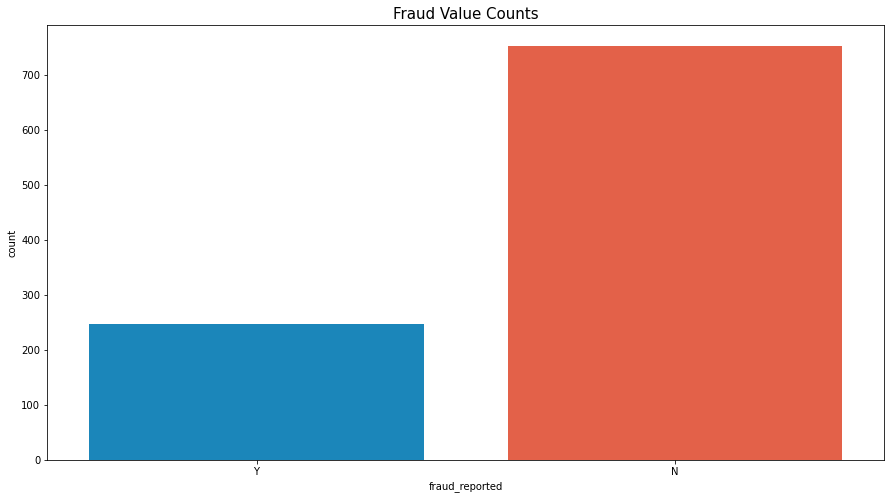

In [22]:
plt.figure(figsize=(15,8))
plt.title('Fraud Value Counts',fontsize=15)
plt.style.use('fivethirtyeight')
sns.countplot(df['fraud_reported'], data=df)
plt.show()

In [23]:
df['fraud_reported'].value_counts()/1000*100

N    75.3
Y    24.7
Name: fraud_reported, dtype: float64

Looks like our Target column has imbalanced classes . Classes are 75 % and 25% so we have to make it balance 

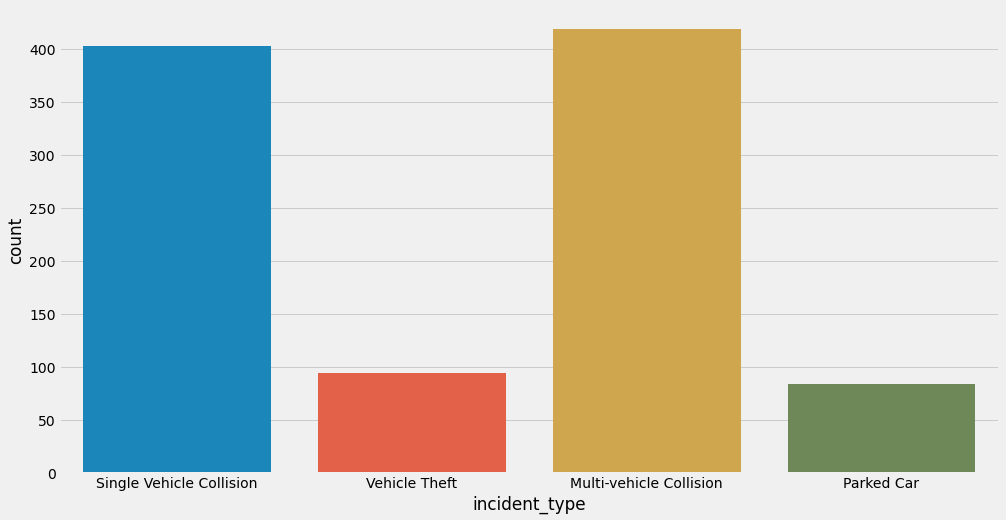

In [24]:
plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')
sns.countplot(df["incident_type"], data=df)
plt.show()


observation:
- In accident type, Multi vehicle collision is major issue.
-  Majority of insurance claimed for accidental vehicle. fer for theft vehicle.

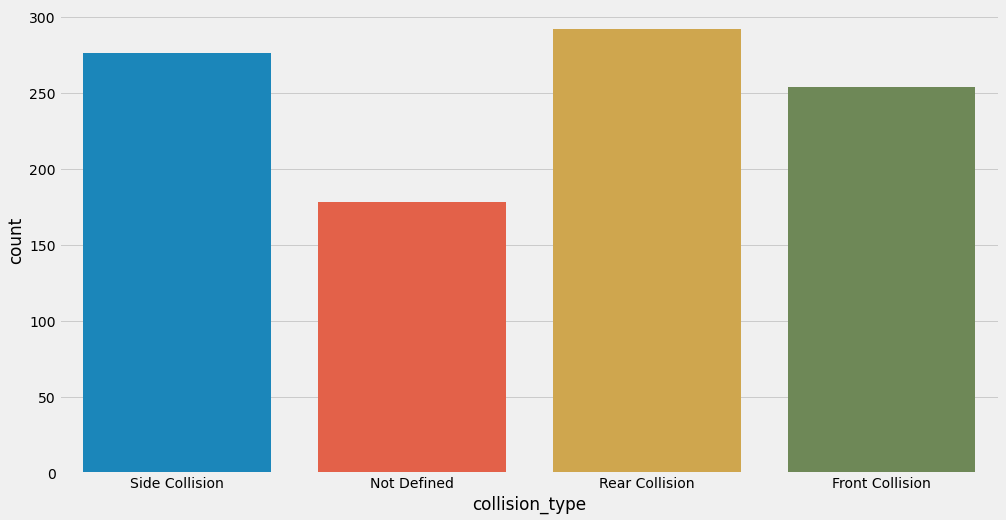

In [25]:
plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')
sns.countplot(df["collision_type"], data=df)
plt.show()


- for most of vehcile, the type of collision is Rear Collision.

- Side collision & Front Collission are apporimatly same (250-260) in our dataset.

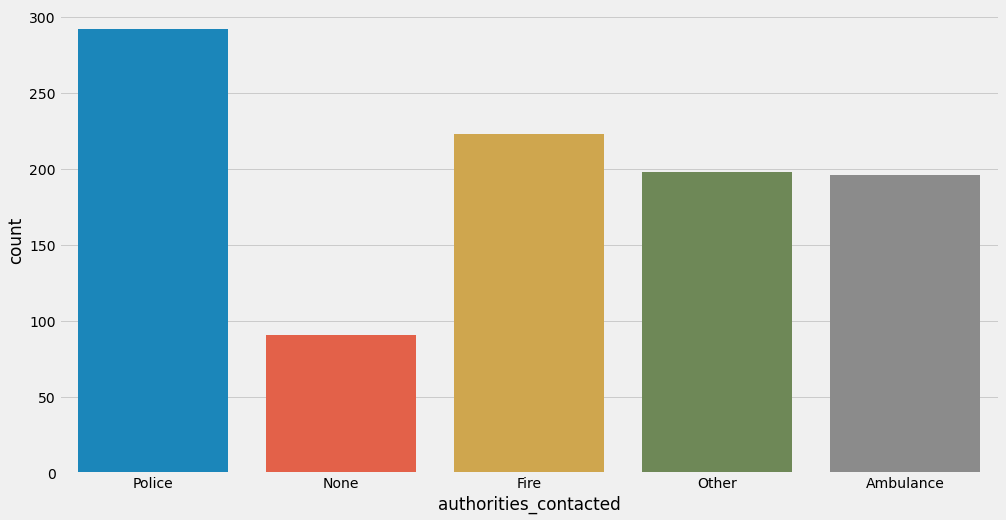

In [26]:
plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')
sns.countplot(df["authorities_contacted"], data=df)
plt.show()

- In most of cases, vehicle owner called to police first.

- Fire after the collision may be a 2nd prime reason.

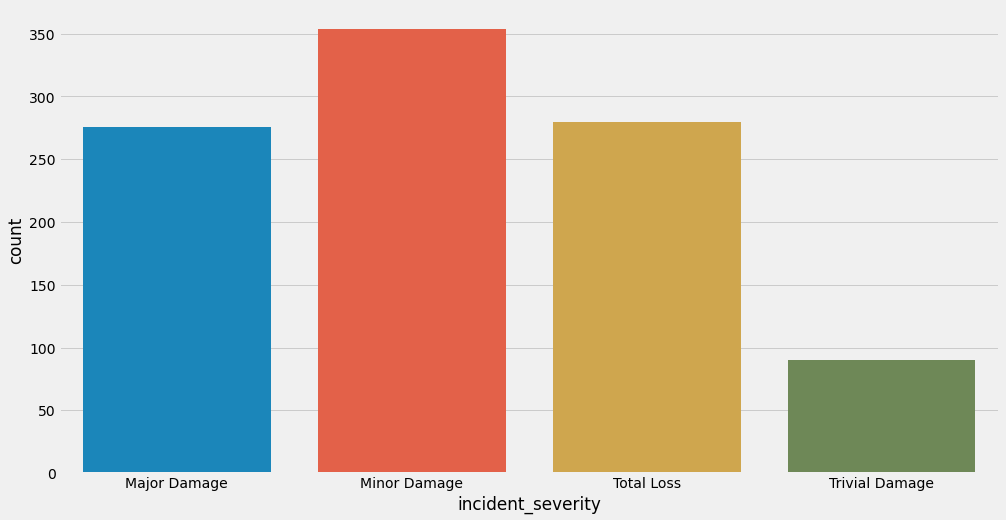

In [27]:
plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')
sns.countplot(df["incident_severity"], data=df)
plt.show()

- In most of insurance claim, the damage to vehicle is minor in nature.

-  Major damage vehicles are 280 in our dataset.

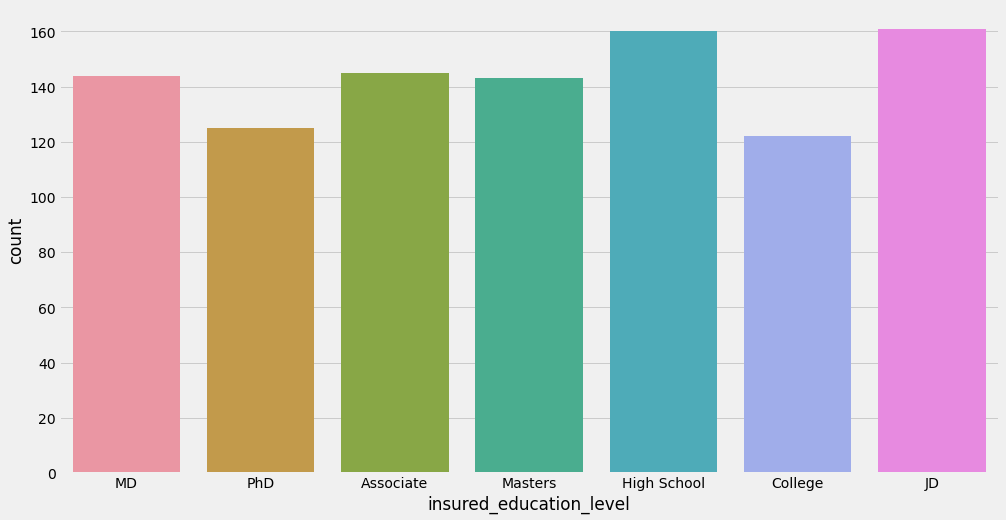

In [28]:
plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')
sns.countplot(df["insured_education_level"], data=df)
plt.show()

Highscool passout and doctor of law are the major persons who claimed for Insurance in our dataset

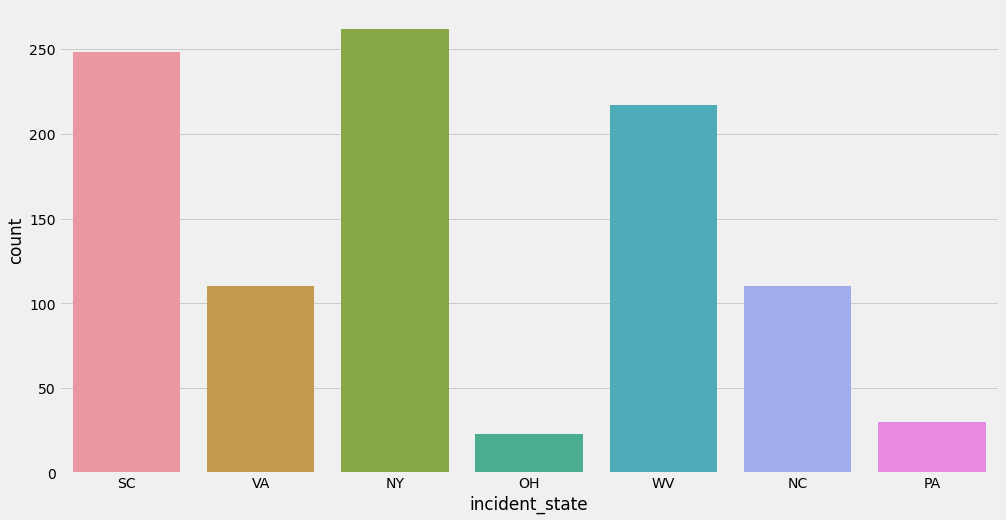

In [29]:
plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')
sns.countplot(df["incident_state"], data=df)
plt.show()

Majority of the incident have happened in NY after that incident have happened in Sc

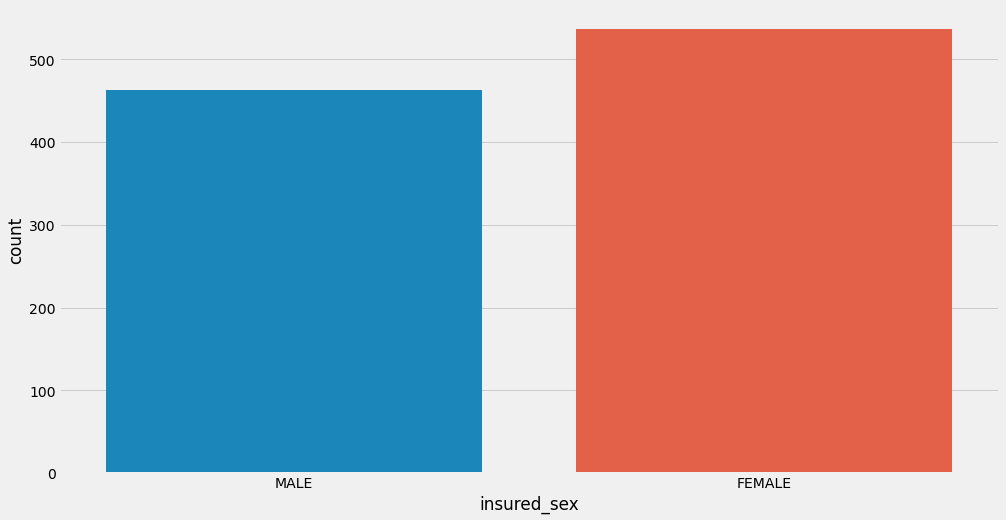

In [30]:
plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')
sns.countplot(df["insured_sex"], data=df)
plt.show()


In our dataset, Females claims more than men for vehicle insurance.

Visualization with target



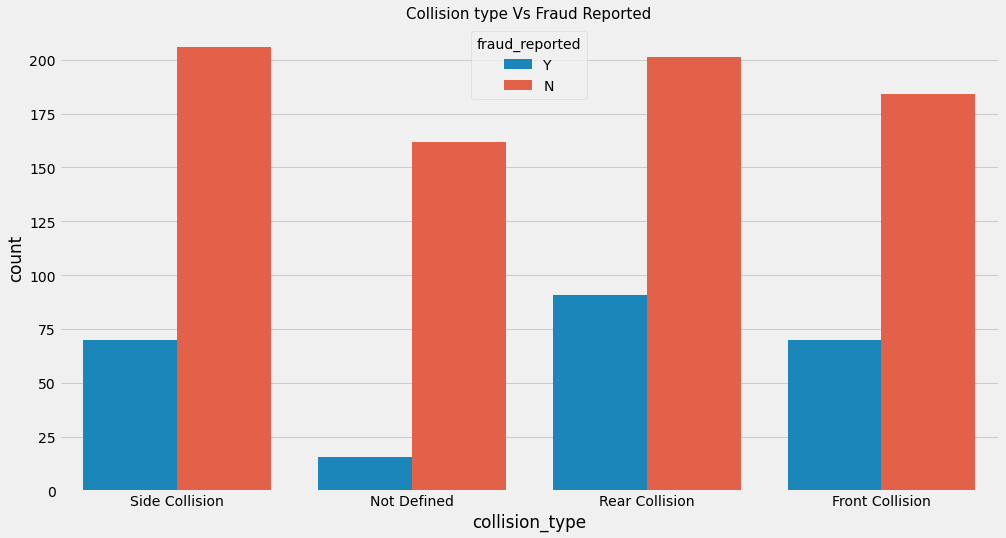

In [31]:
plt.figure(figsize=(15,8))
plt.title('Collision type Vs Fraud Reported',fontsize=15)
plt.style.use('fivethirtyeight')
sns.countplot(df['collision_type'],hue='fraud_reported',data=df)
plt.show()

We could see that in rear collision most genuine appicant claime for insurance cover. There is lease froud reported in case of Rear collision



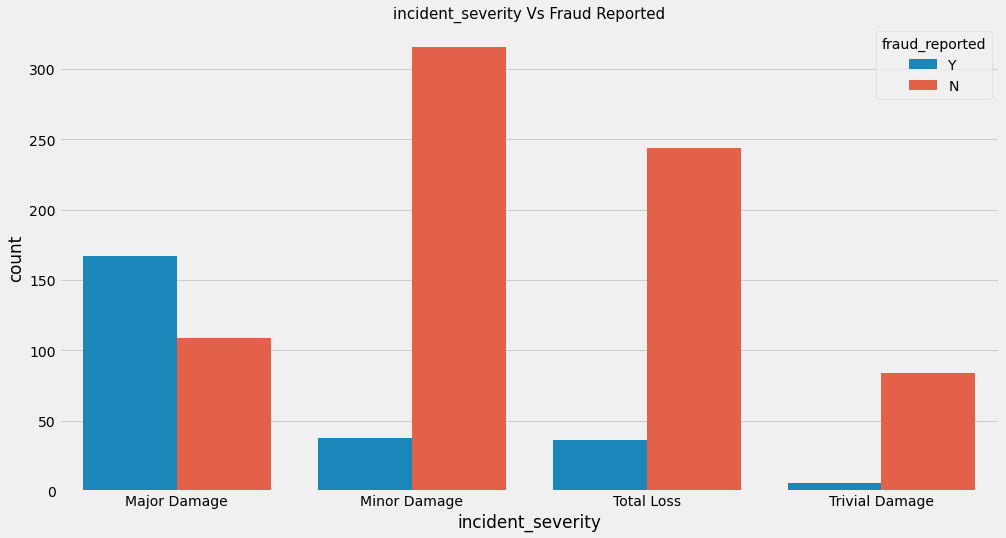

In [32]:
plt.figure(figsize=(15,8))
plt.title('incident_severity Vs Fraud Reported',fontsize=15)
plt.style.use('fivethirtyeight')
sns.countplot(df['incident_severity'],hue='fraud_reported',data=df)
plt.show()


- In mAjor damage case most of Fraud insurance claims reported.

- In minor case we could see very least cases reported to froud as compared to number of cases reported of minor damage.

-  In trivial damage, lowest fraud reported.

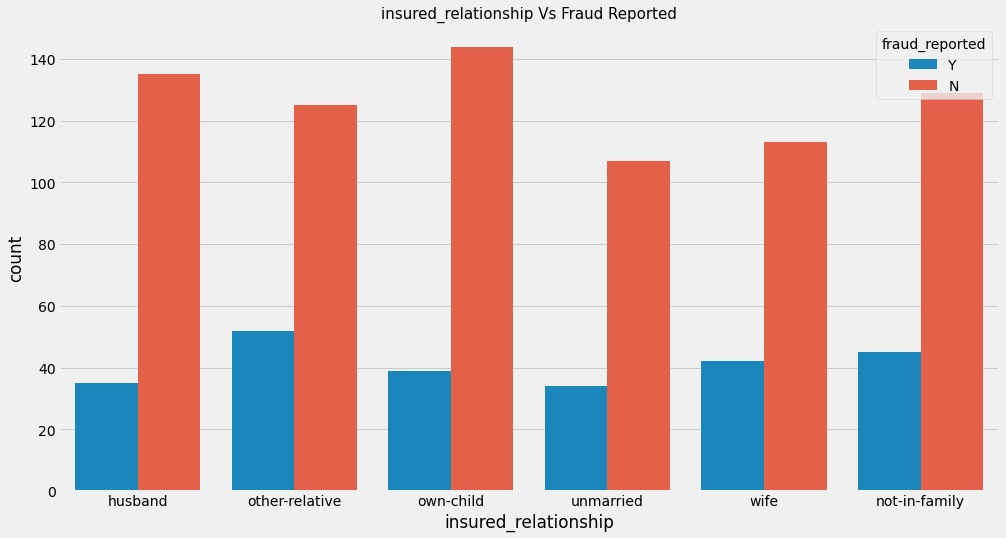

In [33]:
plt.figure(figsize=(15,8))
plt.title('insured_relationship Vs Fraud Reported',fontsize=15)
sns.countplot(df['insured_relationship'],hue='fraud_reported',data=df)
plt.show()

# Checking for distribution

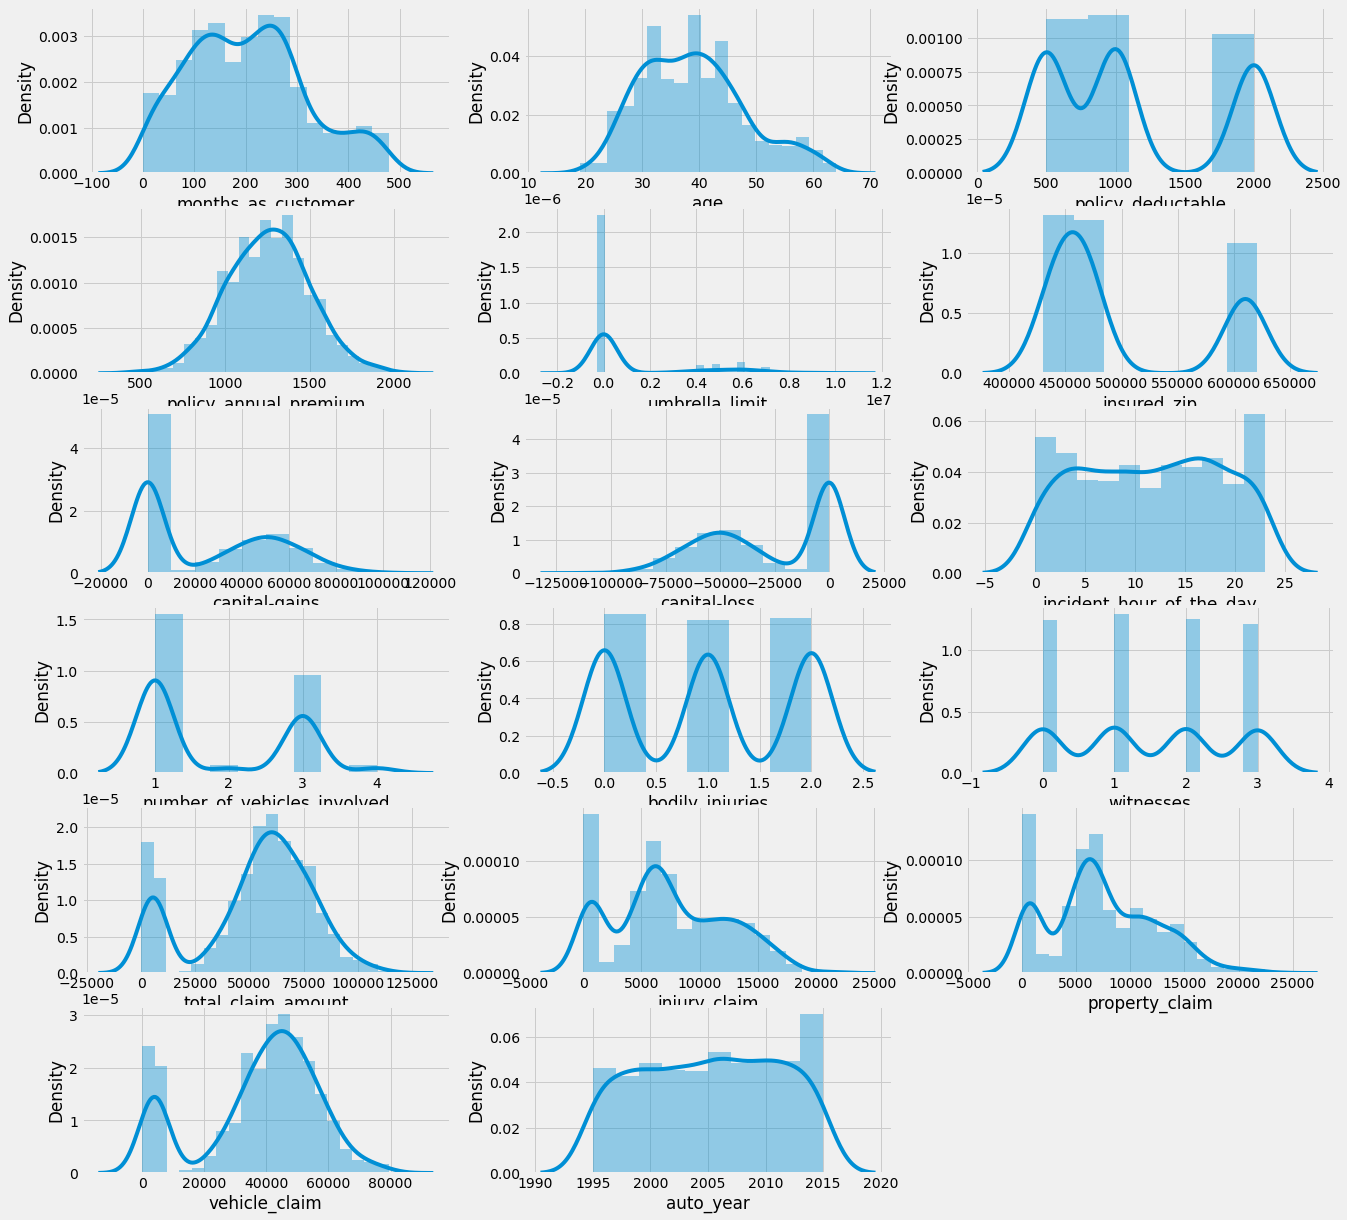

In [34]:
plt.figure(figsize=(20,20))
for i,j in enumerate(num_var):
    plt.subplot(6,3,i+1)
    sns.distplot(df[j])
plt.show()    

# Checking for outliers

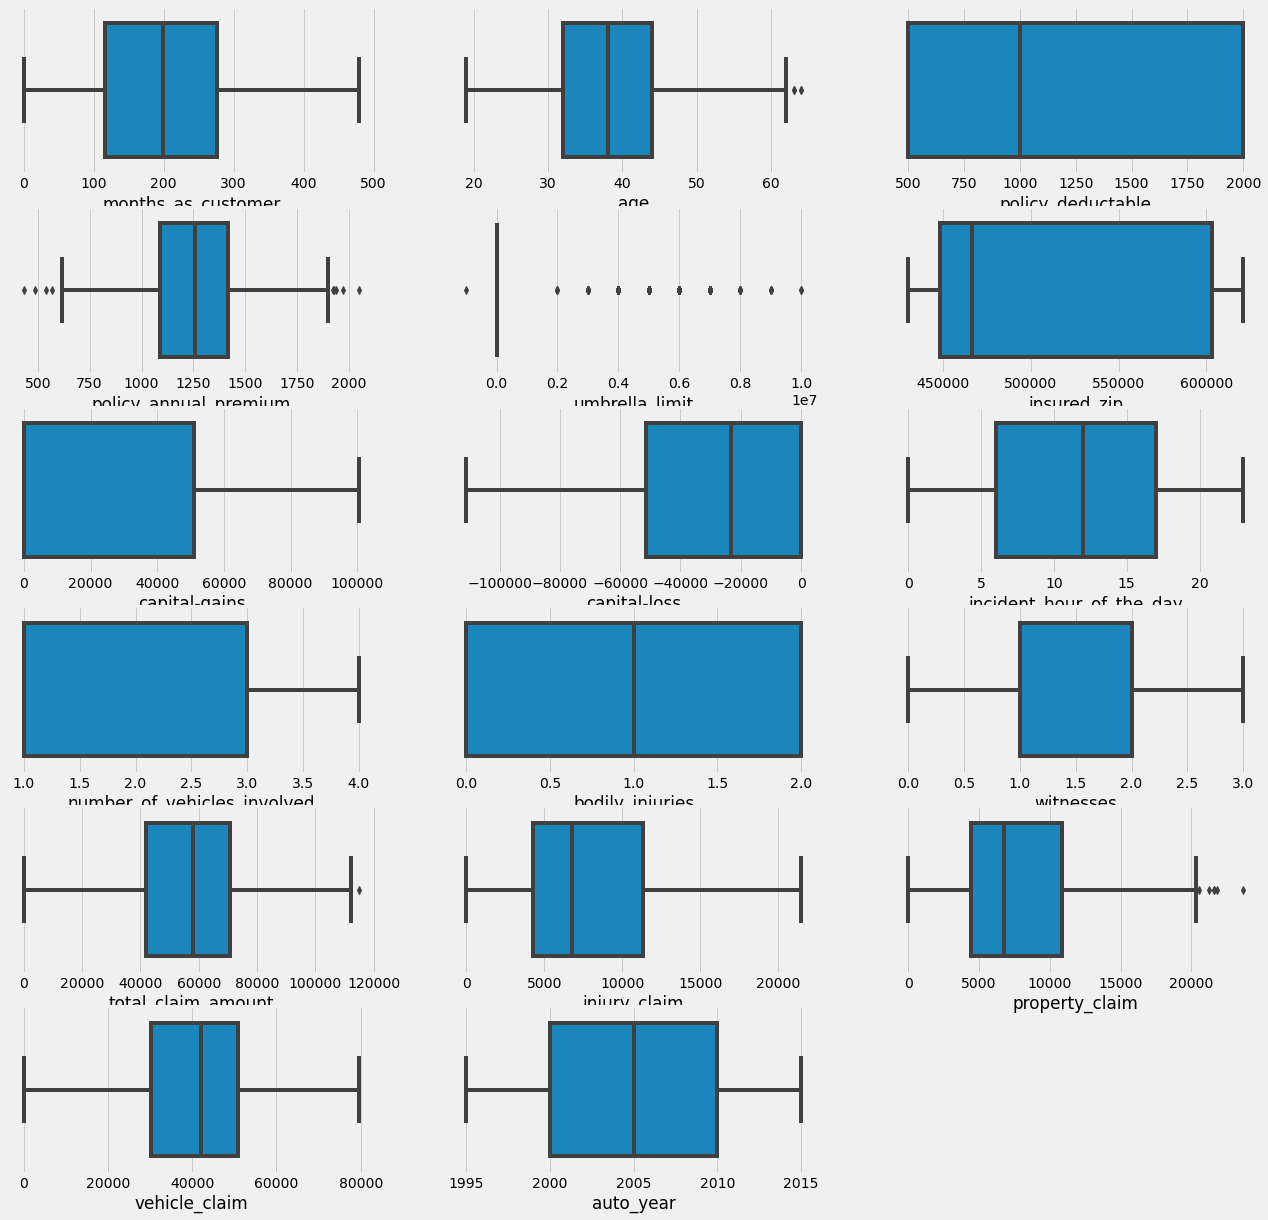

In [35]:
plt.figure(figsize=(20,20))
for i,j in enumerate(num_var):
    plt.subplot(6,3,i+1)
    sns.boxplot(df[j])
plt.show() 

# Removing Outliers using IQR

In [36]:
for i in num_var:
    IQR = df[i].quantile(.75) - df[i].quantile(.25) 
    upper = df[i].quantile(.75) + 1.5 * IQR
    lower = df[i].quantile(.25) - 1.5 * IQR
    df[i] = np.where(df[i]>upper,upper,np.where(df[i]<lower,lower,df[i]))

# Checking for skewness

In [37]:
df.skew()

months_as_customer             0.362177
age                            0.469878
policy_deductable              0.477887
policy_annual_premium          0.016003
umbrella_limit                 0.000000
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.595351
injury_claim                   0.264811
property_claim                 0.348531
vehicle_claim                 -0.621098
auto_year                     -0.048289
policy_bind_Day                0.024372
policy_bind_Month             -0.029321
policy_bind_year               0.052511
incident_Day                   0.059111
incident_Month                 1.375894
dtype: float64

In [38]:
num_var = []
cat_var = []

for i in df.columns:
    if df[i].dtype == "O":
        cat_var.append(i)
    else:
        num_var.append(i)

In [39]:
skew_colm=[]
for i in num_var:
    if (df[i].skew() > 0.5) | (df[i].skew() < -0.5):
        skew_colm.append(i)
    
    

In [40]:
skew_colm

['insured_zip',
 'number_of_vehicles_involved',
 'total_claim_amount',
 'vehicle_claim',
 'incident_Month']

In [41]:
df["insured_zip"],params = stats.boxcox(df["insured_zip"]+0.0001)
df["incident_Month"],params = stats.boxcox(df["incident_Month"]+0.0001)
df["number_of_vehicles_involved"],params = stats.boxcox(df["number_of_vehicles_involved"]+0.0001)

In [42]:
df["total_claim_amount"]= np.square(df["total_claim_amount"]+0.0001)
df["vehicle_claim"] = np.square(df["vehicle_claim"]+0.0001)


In [43]:
df.skew()

months_as_customer             0.362177
age                            0.469878
policy_deductable              0.477887
policy_annual_premium          0.016003
umbrella_limit                 0.000000
insured_zip                    0.000000
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.355583
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount             0.529235
injury_claim                   0.264811
property_claim                 0.348531
vehicle_claim                  0.488948
auto_year                     -0.048289
policy_bind_Day                0.024372
policy_bind_Month             -0.029321
policy_bind_year               0.052511
incident_Day                   0.059111
incident_Month                 0.217811
dtype: float64

# Label Encoding the Categorical variables

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_var:
    df[i]=le.fit_transform(df[i])

In [45]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Day,policy_bind_Month,policy_bind_year,incident_Day,incident_Month
0,328.0,48.0,2,1,1000.0,1406.91,0.0,0.177184,1,4,2,17,0,53300.0,0.0,2,3,0,4,4,1,5.0,0.000100,2,1.0,2.0,2,5.127992e+09,6510.0,13020.0,2.712326e+09,10,1,2004.0,1,17,10,2014,25,0.000100
1,228.0,42.0,1,1,2000.0,1197.22,0.0,0.177184,1,4,6,15,2,0.0,0.0,3,1,1,4,5,5,8.0,0.000100,1,0.0,0.0,1,2.570490e+07,780.0,780.0,1.232010e+07,8,12,2007.0,1,27,6,2006,21,0.000100
2,134.0,29.0,2,0,2000.0,1413.14,0.0,0.177184,0,6,11,2,3,35100.0,0.0,0,2,1,4,1,1,7.0,0.672345,0,2.0,3.0,0,1.200623e+09,7700.0,3850.0,5.336100e+08,4,30,2007.0,0,9,6,2000,22,0.578280
3,256.0,41.0,0,1,2000.0,1415.74,0.0,0.177184,0,6,1,2,4,48900.0,-62400.0,2,0,0,4,2,0,5.0,0.000100,1,1.0,2.0,0,4.019560e+09,6340.0,6340.0,2.572518e+09,3,34,2014.0,1,25,5,1990,1,1.318053
4,228.0,44.0,0,2,1000.0,1583.91,0.0,0.177184,1,0,11,2,4,66000.0,-46000.0,3,1,1,2,1,0,20.0,0.000100,0,0.0,1.0,0,4.225000e+07,1300.0,650.0,2.070250e+07,0,31,2009.0,0,6,6,2014,17,0.578280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,38.0,2,2,1000.0,1310.80,0.0,0.177184,0,5,2,13,4,0.0,0.0,2,0,1,1,0,4,20.0,0.000100,2,0.0,1.0,1,7.603840e+09,17440.0,8720.0,3.725882e+09,6,6,2006.0,0,16,7,1991,22,0.578280
996,285.0,41.0,0,0,1000.0,1436.79,0.0,0.177184,0,6,9,17,5,70900.0,0.0,2,2,0,1,4,3,23.0,0.000100,2,2.0,3.0,1,1.176791e+10,18080.0,18080.0,5.230182e+09,13,28,2015.0,0,1,5,2014,24,0.000100
997,130.0,34.0,2,1,500.0,1383.49,0.0,0.177184,0,5,1,3,2,35100.0,0.0,0,3,1,4,0,0,4.0,0.672345,1,2.0,3.0,2,4.556250e+09,7500.0,7500.0,2.756250e+09,11,19,1996.0,0,17,2,2003,23,0.000100
998,458.0,62.0,0,2,2000.0,1356.92,0.0,0.177184,1,0,5,0,5,0.0,0.0,2,2,0,3,1,0,2.0,0.000100,1,0.0,1.0,2,2.207120e+09,5220.0,5220.0,1.335172e+09,1,5,1998.0,0,18,11,2011,26,0.578280


<AxesSubplot:title={'center':'Correlation with fraud_reported'}>

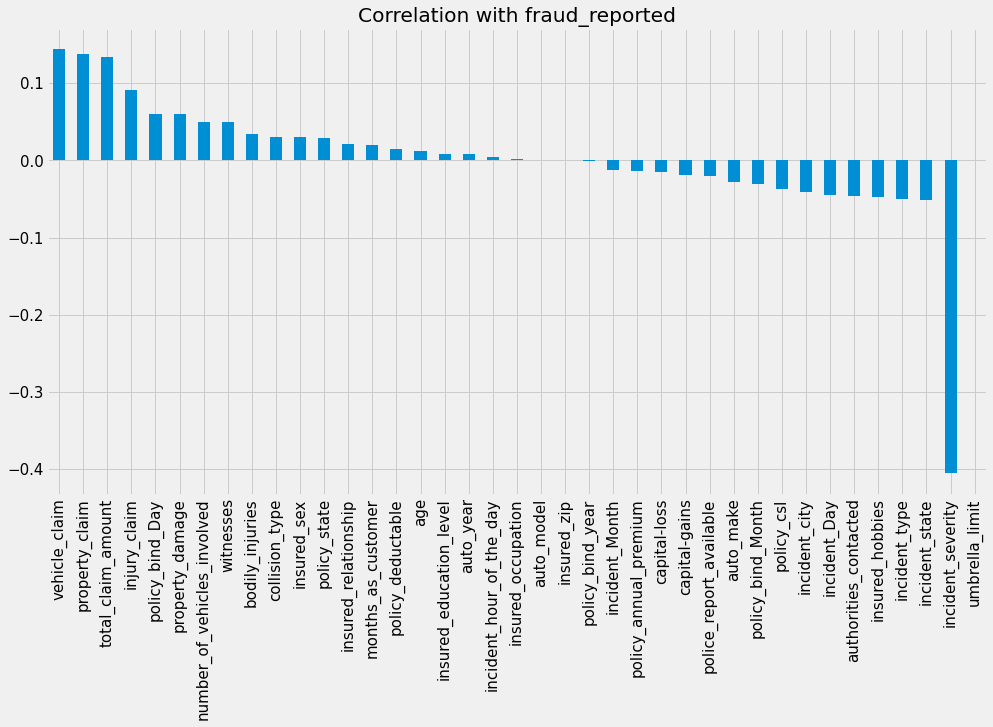

In [46]:
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot.bar(figsize=(15,8),grid=True,title='Correlation with fraud_reported',fontsize=15)


- Incident Severity is highly negatively correlated with our target Attribute.

- Neither there is a very strong nor very weak correlation exist with target attribute.

- Auto model, insured occupation has approx zero correlation with our target attribute

<AxesSubplot:>

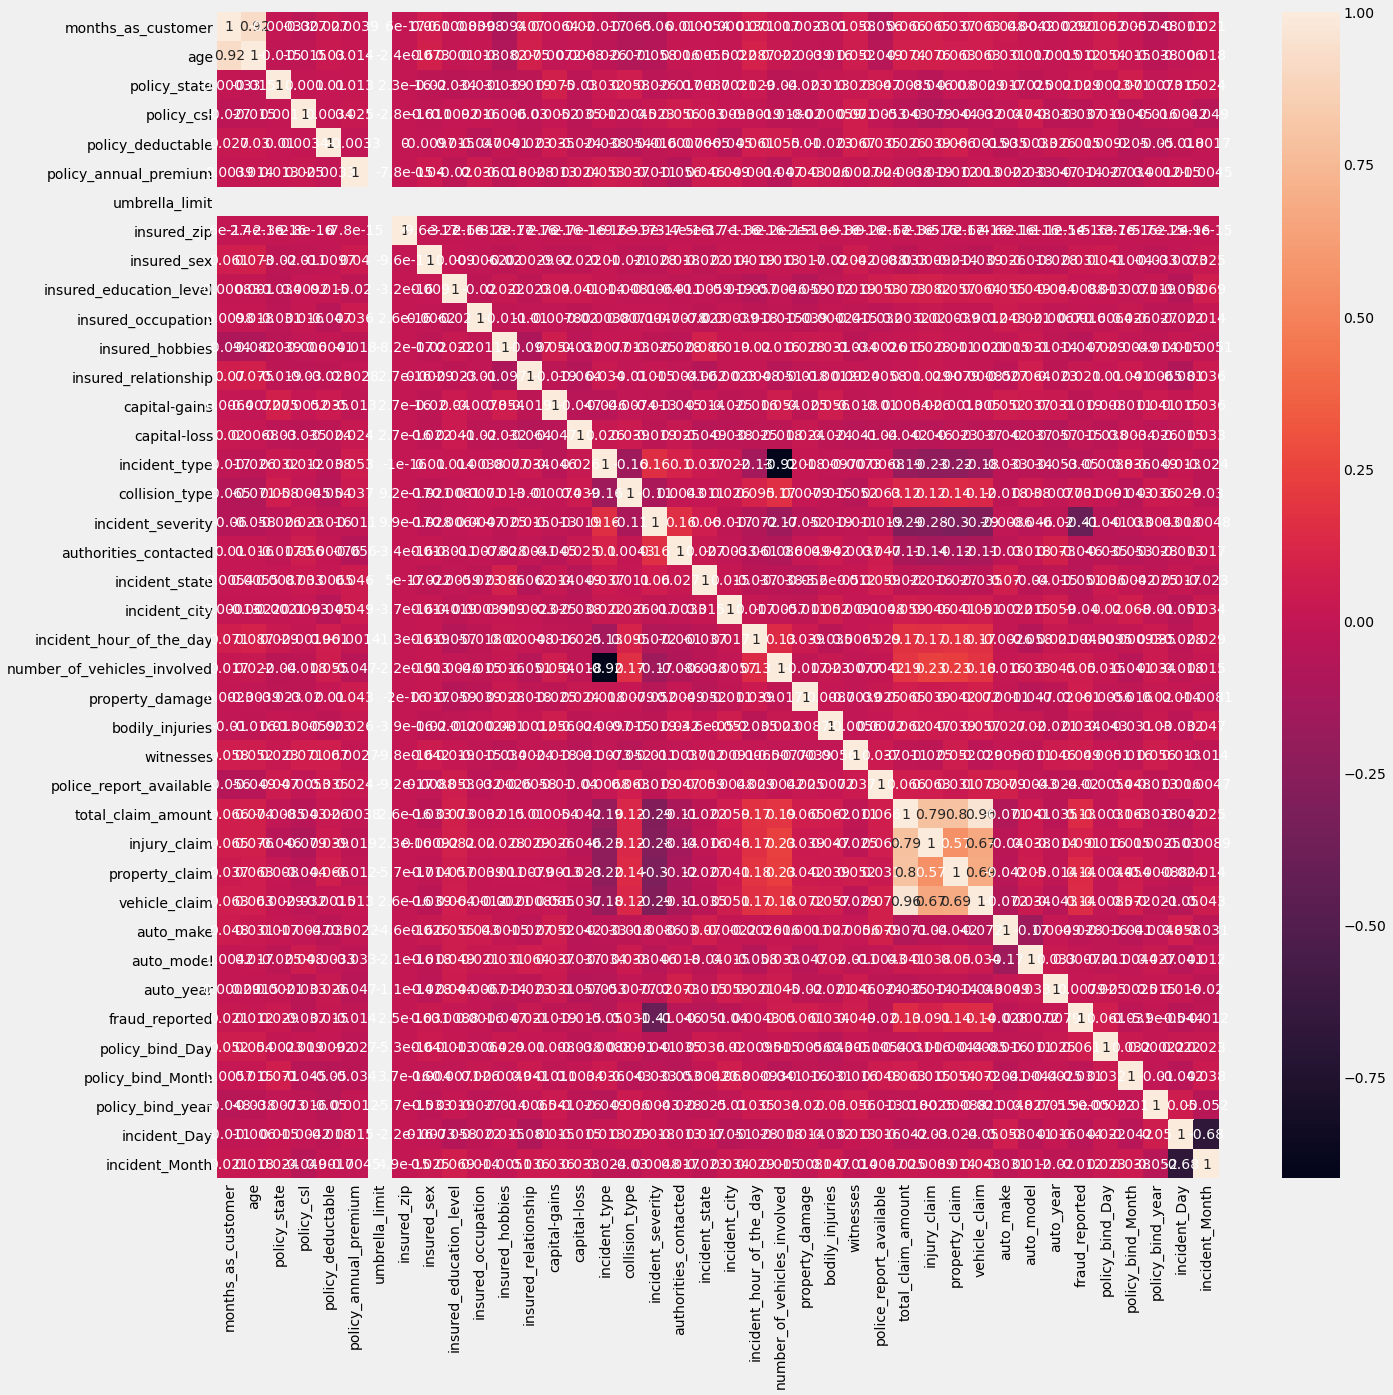

In [47]:
## Correlation Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

dropping umbrella_limit since this collumn has constant values

In [48]:
df.drop("umbrella_limit",axis=1,inplace=True)

In [ ]:
sns.pairplot(df,hue=df["fraud_reported"])

# Splitting the Data into input and output label

In [49]:
x=df.drop(['fraud_reported'],axis=1)
y=df[['fraud_reported']]

In [50]:
x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_Day,policy_bind_Month,policy_bind_year,incident_Day,incident_Month
0,328.0,48.0,2,1,1000.0,1406.91,0.177184,1,4,2,17,0,53300.0,0.0,2,3,0,4,4,1,5.0,0.000100,2,1.0,2.0,2,5.127992e+09,6510.0,13020.0,2.712326e+09,10,1,2004.0,17,10,2014,25,0.000100
1,228.0,42.0,1,1,2000.0,1197.22,0.177184,1,4,6,15,2,0.0,0.0,3,1,1,4,5,5,8.0,0.000100,1,0.0,0.0,1,2.570490e+07,780.0,780.0,1.232010e+07,8,12,2007.0,27,6,2006,21,0.000100
2,134.0,29.0,2,0,2000.0,1413.14,0.177184,0,6,11,2,3,35100.0,0.0,0,2,1,4,1,1,7.0,0.672345,0,2.0,3.0,0,1.200623e+09,7700.0,3850.0,5.336100e+08,4,30,2007.0,9,6,2000,22,0.578280
3,256.0,41.0,0,1,2000.0,1415.74,0.177184,0,6,1,2,4,48900.0,-62400.0,2,0,0,4,2,0,5.0,0.000100,1,1.0,2.0,0,4.019560e+09,6340.0,6340.0,2.572518e+09,3,34,2014.0,25,5,1990,1,1.318053
4,228.0,44.0,0,2,1000.0,1583.91,0.177184,1,0,11,2,4,66000.0,-46000.0,3,1,1,2,1,0,20.0,0.000100,0,0.0,1.0,0,4.225000e+07,1300.0,650.0,2.070250e+07,0,31,2009.0,6,6,2014,17,0.578280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,38.0,2,2,1000.0,1310.80,0.177184,0,5,2,13,4,0.0,0.0,2,0,1,1,0,4,20.0,0.000100,2,0.0,1.0,1,7.603840e+09,17440.0,8720.0,3.725882e+09,6,6,2006.0,16,7,1991,22,0.578280
996,285.0,41.0,0,0,1000.0,1436.79,0.177184,0,6,9,17,5,70900.0,0.0,2,2,0,1,4,3,23.0,0.000100,2,2.0,3.0,1,1.176791e+10,18080.0,18080.0,5.230182e+09,13,28,2015.0,1,5,2014,24,0.000100
997,130.0,34.0,2,1,500.0,1383.49,0.177184,0,5,1,3,2,35100.0,0.0,0,3,1,4,0,0,4.0,0.672345,1,2.0,3.0,2,4.556250e+09,7500.0,7500.0,2.756250e+09,11,19,1996.0,17,2,2003,23,0.000100
998,458.0,62.0,0,2,2000.0,1356.92,0.177184,1,0,5,0,5,0.0,0.0,2,2,0,3,1,0,2.0,0.000100,1,0.0,1.0,2,2.207120e+09,5220.0,5220.0,1.335172e+09,1,5,1998.0,18,11,2011,26,0.578280


# Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X=s.fit_transform(x)
X=pd.DataFrame(X,columns=x.columns)
X

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_Day,policy_bind_Month,policy_bind_year,incident_Day,incident_Month
0,1.078140,0.993200,1.187173,0.060937,-0.222383,0.621182,2.775558e-17,1.076953,0.530931,-1.158316,1.281737,-1.437957,1.011331,0.953851,0.766005,1.235749,-1.260614,1.196963,0.351762,-0.962196,-0.956261,-0.845037,1.296313,0.009759,0.461838,1.270313,0.662192,-0.189283,1.172145,0.722022,0.856466,-1.645743,-0.183440,0.175451,1.015026,1.684992,1.141603,-1.128789
1,0.208995,0.335307,-0.016856,0.060937,1.412784,-0.244857,2.775558e-17,1.076953,0.530931,-0.162558,0.929078,-0.247595,-0.901927,0.953851,1.691132,-0.517086,-0.195906,1.196963,0.815829,0.995476,-0.524475,-0.845037,0.045046,-1.210174,-1.338700,0.035801,-1.387873,-1.363822,-1.377246,-1.402995,0.360539,-0.657470,0.315491,1.305938,-0.164894,0.597550,0.758386,-1.128789
2,-0.608002,-1.090130,1.187173,-1.182668,1.412784,0.646913,2.775558e-17,-0.928546,1.557877,1.082141,-1.363201,0.347586,0.358023,0.953851,-1.084249,0.359331,-0.195906,1.196963,-1.040437,-0.962196,-0.668404,1.189375,-1.206222,1.229693,1.362107,-1.198712,-0.915799,0.054644,-0.737816,-0.992718,-0.631315,0.959702,0.315491,-0.728938,-0.164894,-0.218032,0.854190,0.033252
3,0.452355,0.225658,-1.220886,0.060937,1.412784,0.657651,2.775558e-17,-0.928546,1.557877,-1.407256,-1.363201,0.942766,0.853388,-1.267577,0.766005,-1.393504,-1.260614,1.196963,-0.576371,-1.451614,-0.956261,-0.845037,0.045046,0.009759,0.461838,-1.198712,0.216831,-0.224130,-0.219189,0.611987,-0.879279,1.319074,1.479664,1.079841,-0.459874,-1.577335,-1.157698,1.520068
4,0.208995,0.554604,-1.220886,1.304542,-0.222383,1.352209,2.775558e-17,1.076953,-1.522961,1.082141,-1.363201,0.942766,1.467210,-0.683741,1.691132,-0.517086,-0.195906,-0.109052,-1.040437,-1.451614,1.202666,-0.845037,-1.206222,-1.210174,-0.438431,-1.198712,-1.381225,-1.257232,-1.404323,-1.396397,-1.623169,1.049545,0.648112,-1.068084,-0.164894,1.684992,0.375169,0.033252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103289,1.187173,1.304542,-0.222383,0.224239,2.775558e-17,-0.928546,1.044404,-1.158316,0.576420,0.942766,-0.901927,0.953851,0.766005,-1.393504,-0.195906,-0.762060,-1.504504,0.506058,1.202666,-0.845037,1.296313,-1.210174,-0.438431,0.035801,1.656970,2.051155,0.276526,1.519731,-0.135388,-1.196528,0.149180,0.062403,0.130086,-1.441405,0.854190,0.033252
996,0.704407,0.225658,-1.220886,-1.182668,-0.222383,0.744590,2.775558e-17,-0.928546,1.557877,0.584261,1.281737,1.537947,1.643100,0.953851,0.766005,0.359331,-1.260614,-0.762060,0.351762,0.016640,1.634452,-0.845037,1.296313,1.229693,1.362107,0.035801,3.330065,2.182342,2.226060,2.703678,1.600357,0.780016,1.645974,-1.633327,-0.459874,1.684992,1.045799,-1.128789
997,-0.642767,-0.541885,1.187173,0.060937,-1.039966,0.524455,2.775558e-17,-0.928546,1.044404,-1.407256,-1.186872,-0.247595,0.358023,0.953851,-1.084249,1.235749,-0.195906,1.196963,-1.504504,-1.451614,-1.100189,1.189375,0.045046,1.229693,1.362107,1.270313,0.432469,0.013648,0.022420,0.756591,1.104430,-0.028570,-1.513924,0.175451,-1.344813,0.189759,0.949994,-1.128789
998,2.208028,2.528286,-1.220886,1.304542,1.412784,0.414719,2.775558e-17,1.076953,-1.522961,-0.411497,-1.715859,1.537947,-0.901927,0.953851,0.766005,0.359331,-1.260614,0.543955,-1.040437,-1.451614,-1.388046,-0.845037,0.045046,-1.210174,-0.438431,1.270313,-0.511395,-0.453708,-0.452467,-0.361856,-1.375206,-1.286371,-1.

# Feature Importance

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(X,y)

ExtraTreesClassifier()

In [53]:
print(extra.feature_importances_)

[0.02447793 0.02519593 0.020922   0.02233418 0.02062062 0.02572406
 0.         0.01641396 0.02357309 0.02738846 0.03827963 0.02232912
 0.0214059  0.02169706 0.01478905 0.02005666 0.16728434 0.02227039
 0.02540579 0.02286348 0.02311756 0.01350014 0.02108685 0.02042839
 0.02346461 0.02085172 0.02514962 0.02555094 0.02763291 0.02908805
 0.02507193 0.02288634 0.02442548 0.02262116 0.02399827 0.02290061
 0.02326043 0.02193331]


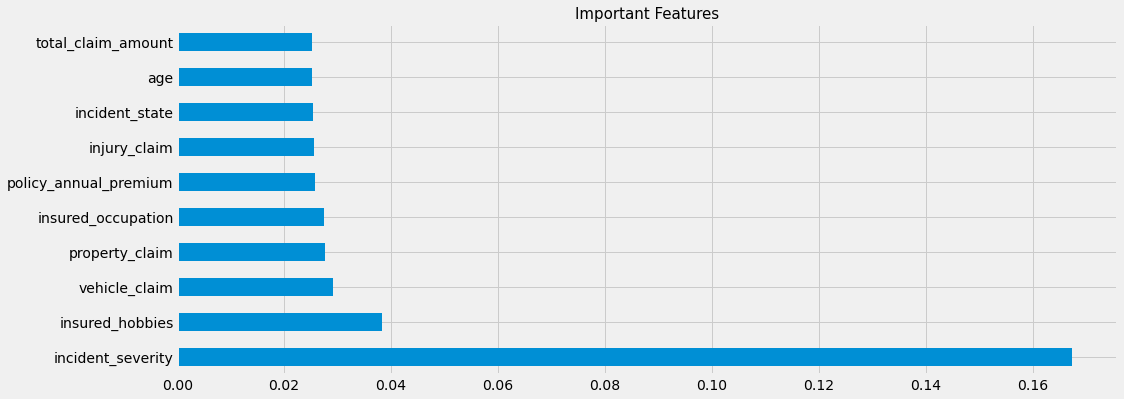

In [54]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

In [55]:
X = X[["incident_severity","insured_hobbies","property_claim","vehicle_claim","total_claim_amount","insured_occupation","incident_Day","policy_bind_Month","auto_make","injury_claim"]]

In [56]:
X

,incident_severity,insured_hobbies,property_claim,vehicle_claim,total_claim_amount,insured_occupation,incident_Day,policy_bind_Month,auto_make,injury_claim
0,-1.260614,1.281737,1.172145,0.722022,0.662192,-1.158316,1.141603,1.015026,0.856466,-0.189283
1,-0.195906,0.929078,-1.377246,-1.402995,-1.387873,-0.162558,0.758386,-0.164894,0.360539,-1.363822
2,-0.195906,-1.363201,-0.737816,-0.992718,-0.915799,1.082141,0.854190,-0.164894,-0.631315,0.054644
3,-1.260614,-1.363201,-0.219189,0.611987,0.216831,-1.407256,-1.157698,-0.459874,-0.879279,-0.224130
4,-0.195906,-1.363201,-1.404323,-1.396397,-1.381225,1.082141,0.375169,-0.164894,-1.623169,-1.257232
...,...,...,...,...,...,...,...,...,...,...
995,-0.195906,0.576420,0.276526,1.519731,1.656970,-1.158316,0.854190,0.130086,-0.135388,2.051155
996,-1.260614,1.281737,2.226060,2.703678,3.330065,0.584261,1.045799,-0.459874,1.600357,2.182342
997,-0.195906,-1.186872,0.022420,0.756591,0.432469,-1.407256,0.949994,-1.344813,1.104430,0.013648
998,-1.260614,-1.715859,-0.452467,-0.361856,-0.511395,-0.411497,1.237407,1.310006,-1.375206,-0.453708


In [57]:
y

,fraud_reported
0,1
1,1
2,0
3,1
4,0
...,...
995,0
996,0
997,0
998,0


In [58]:
y.value_counts()

fraud_reported
0                 753
1                 247
dtype: int64

# Performing Smote 

In [59]:
smote = SMOTE(sampling_strategy="minority")
X,y=smote.fit_resample(X,y)

In [60]:
y.value_counts()

fraud_reported
1                 753
0                 753
dtype: int64

now our classes are balanced 

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score , RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc

# Checking for best performing model

In [62]:
def max_accuracy_score(pipe,X,y):
    max_accuracy=0
    for i in range(42,100):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i,stratify=y)
        pipe.fit(X_train,y_train)
        y_pred=pipe.predict(X_test)
        y_train_pred =pipe.predict(X_train)
        accuracy_check=accuracy_score(y_test,y_pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max Accuracy score corresponding to',final_r,'is',max_accuracy)
    print('cross validation score',cross_val_score(pipe,X,y,scoring='accuracy').mean()*100)
    print('Standard Deviation',cross_val_score(pipe,X,y,scoring='accuracy').std()*100)
    print('Training accuracy',round(accuracy_score(y_train_pred,y_train),2)*100)
    print('Test Accuracy',round(accuracy_score(y_pred,y_test),2)*100)
    print('Confusion Matrix\n')
    print(confusion_matrix(y_test,y_pred))
    print('Classification Report',classification_report(y_test,y_pred))

# LogisticRegression

In [63]:
lr=LogisticRegression()
max_accuracy_score(lr,X,y)

max Accuracy score corresponding to 64 is 0.7682119205298014
cross validation score 72.64394622780577
Standard Deviation 2.193719434087776
Training accuracy 74.0
Test Accuracy 72.0
Confusion Matrix

[[105  46]
 [ 40 111]]
Classification Report               precision    recall  f1-score   support

           0       0.72      0.70      0.71       151
           1       0.71      0.74      0.72       151

    accuracy                           0.72       302
   macro avg       0.72      0.72      0.72       302
weighted avg       0.72      0.72      0.72       302



# DecisionTreeClassifier

In [64]:
dt=DecisionTreeClassifier()
max_accuracy_score(dt,X,y)

max Accuracy score corresponding to 53 is 0.8807947019867549
cross validation score 84.40056324393304
Standard Deviation 3.989448241742658
Training accuracy 100.0
Test Accuracy 82.0
Confusion Matrix

[[120  31]
 [ 23 128]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.79      0.82       151
           1       0.81      0.85      0.83       151

    accuracy                           0.82       302
   macro avg       0.82      0.82      0.82       302
weighted avg       0.82      0.82      0.82       302



# KNN

In [65]:
knn=KNeighborsClassifier()
max_accuracy_score(knn,X,y)

max Accuracy score corresponding to 50 is 0.8377483443708609
cross validation score 79.28252403687488
Standard Deviation 1.0693154555079167
Training accuracy 86.0
Test Accuracy 76.0
Confusion Matrix

[[ 88  63]
 [  8 143]]
Classification Report               precision    recall  f1-score   support

           0       0.92      0.58      0.71       151
           1       0.69      0.95      0.80       151

    accuracy                           0.76       302
   macro avg       0.81      0.76      0.76       302
weighted avg       0.81      0.76      0.76       302



# Naive Bayse

In [66]:
NB=GaussianNB()
max_accuracy_score(NB,X,y)

max Accuracy score corresponding to 52 is 0.7218543046357616
cross validation score 69.05832654947085
Standard Deviation 2.9457155713142265
Training accuracy 69.0
Test Accuracy 68.0
Confusion Matrix

[[ 92  59]
 [ 37 114]]
Classification Report               precision    recall  f1-score   support

           0       0.71      0.61      0.66       151
           1       0.66      0.75      0.70       151

    accuracy                           0.68       302
   macro avg       0.69      0.68      0.68       302
weighted avg       0.69      0.68      0.68       302



# SVC

In [67]:
scv=SVC()
max_accuracy_score(scv,X,y)

max Accuracy score corresponding to 61 is 0.8344370860927153
cross validation score 79.48295967085433
Standard Deviation 1.9315012742582738
Training accuracy 83.0
Test Accuracy 80.0
Confusion Matrix

[[122  29]
 [ 30 121]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.81      0.80      0.80       151

    accuracy                           0.80       302
   macro avg       0.80      0.80      0.80       302
weighted avg       0.80      0.80      0.80       302



# RandomForestClassifier

In [68]:
rf=RandomForestClassifier()
max_accuracy_score(rf,X,y)

max Accuracy score corresponding to 53 is 0.9172185430463576
cross validation score 88.51774438406196
Standard Deviation 4.110189344011317
Training accuracy 100.0
Test Accuracy 87.0
Confusion Matrix

[[125  26]
 [ 14 137]]
Classification Report               precision    recall  f1-score   support

           0       0.90      0.83      0.86       151
           1       0.84      0.91      0.87       151

    accuracy                           0.87       302
   macro avg       0.87      0.87      0.87       302
weighted avg       0.87      0.87      0.87       302



# Adaboost

In [69]:
ada=AdaBoostClassifier()
max_accuracy_score(ada,X,y)

max Accuracy score corresponding to 52 is 0.8940397350993378
cross validation score 85.26523068799365
Standard Deviation 5.359907352322419
Training accuracy 88.0
Test Accuracy 85.0
Confusion Matrix

[[128  23]
 [ 23 128]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.85      0.85       151
           1       0.85      0.85      0.85       151

    accuracy                           0.85       302
   macro avg       0.85      0.85      0.85       302
weighted avg       0.85      0.85      0.85       302



# GRadient Boost

In [70]:
GB=GradientBoostingClassifier()
max_accuracy_score(GB,X,y)

max Accuracy score corresponding to 82 is 0.9139072847682119
cross validation score 86.99016523288817
Standard Deviation 4.651224528310694
Training accuracy 93.0
Test Accuracy 89.0
Confusion Matrix

[[128  23]
 [ 10 141]]
Classification Report               precision    recall  f1-score   support

           0       0.93      0.85      0.89       151
           1       0.86      0.93      0.90       151

    accuracy                           0.89       302
   macro avg       0.89      0.89      0.89       302
weighted avg       0.89      0.89      0.89       302



# ExtraTree

In [71]:
etc=ExtraTreesClassifier()
max_accuracy_score(etc,X,y)

max Accuracy score corresponding to 52 is 0.9370860927152318
cross validation score 90.30934412884206
Standard Deviation 2.7523559813019713
Training accuracy 100.0
Test Accuracy 87.0
Confusion Matrix

[[124  27]
 [ 12 139]]
Classification Report               precision    recall  f1-score   support

           0       0.91      0.82      0.86       151
           1       0.84      0.92      0.88       151

    accuracy                           0.87       302
   macro avg       0.87      0.87      0.87       302
weighted avg       0.87      0.87      0.87       302



# BaggingClassifier

In [72]:
bc=BaggingClassifier()
max_accuracy_score(bc,X,y)

max Accuracy score corresponding to 46 is 0.9205298013245033
cross validation score 87.72150227717763
Standard Deviation 4.545448611521015
Training accuracy 99.0
Test Accuracy 89.0
Confusion Matrix

[[130  21]
 [ 13 138]]
Classification Report               precision    recall  f1-score   support

           0       0.91      0.86      0.88       151
           1       0.87      0.91      0.89       151

    accuracy                           0.89       302
   macro avg       0.89      0.89      0.89       302
weighted avg       0.89      0.89      0.89       302



# VotingClassifier

In [73]:
es=[  ('etc',ExtraTreesClassifier() ),
      ("GB",GradientBoostingClassifier() ),
      ( "rf",RandomForestClassifier() ),
      ("ada",AdaBoostClassifier() ),
       ("svc",SVC())
      ]
vc=VotingClassifier(estimators=es)
max_accuracy_score(vc,X,y)

max Accuracy score corresponding to 82 is 0.9139072847682119
cross validation score 88.11797320190975
Standard Deviation 4.109692305549879
Training accuracy 94.0
Test Accuracy 87.0
Confusion Matrix

[[126  25]
 [ 14 137]]
Classification Report               precision    recall  f1-score   support

           0       0.90      0.83      0.87       151
           1       0.85      0.91      0.88       151

    accuracy                           0.87       302
   macro avg       0.87      0.87      0.87       302
weighted avg       0.87      0.87      0.87       302



# Selectiong gradiennt boost as a best performing model

In [78]:
def max_accuracy_score(pipe,X,y):
    for i in range(0,100):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i,stratify=y)
        pipe.fit(X_train,y_train)
        y_pred=pipe.predict(X_test)
        y_train_pred =pipe.predict(X_train)
        print("At Randon state ",i)
        print('Training accuracy',round(accuracy_score(y_train_pred,y_train),2)*100)
        print('Test Accuracy',round(accuracy_score(y_pred,y_test),2)*100)
        print('cross validation score',cross_val_score(pipe,X,y,scoring='accuracy').mean()*100)
        print('Standard Deviation',cross_val_score(pipe,X,y,scoring='accuracy').std()*100)
        print()

In [79]:
GB=GradientBoostingClassifier()
max_accuracy_score(GB,X,y)

At Randon state  0
Training accuracy 93.0
Test Accuracy 89.0
cross validation score 86.99016523288817
Standard Deviation 4.651224528310694

At Randon state  1
Training accuracy 94.0
Test Accuracy 82.0
cross validation score 86.99016523288817
Standard Deviation 4.651224528310694

At Randon state  2
Training accuracy 93.0
Test Accuracy 87.0
cross validation score 86.99016523288817
Standard Deviation 4.651224528310694

At Randon state  3
Training accuracy 94.0
Test Accuracy 87.0
cross validation score 86.99016523288817
Standard Deviation 4.651224528310694

At Randon state  4
Training accuracy 94.0
Test Accuracy 87.0
cross validation score 86.99016523288817
Standard Deviation 4.651224528310694

At Randon state  5
Training accuracy 92.0
Test Accuracy 90.0
cross validation score 86.99016523288817
Standard Deviation 4.651224528310694

At Randon state  6
Training accuracy 93.0
Test Accuracy 90.0
cross validation score 86.99016523288817
Standard Deviation 4.651224528310694

At Randon state  7
T

cross validation score 86.99016523288817
Standard Deviation 4.651224528310694

At Randon state  59
Training accuracy 93.0
Test Accuracy 87.0
cross validation score 86.99016523288817
Standard Deviation 4.651224528310694

At Randon state  60
Training accuracy 94.0
Test Accuracy 87.0
cross validation score 86.99016523288817
Standard Deviation 4.651224528310694

At Randon state  61
Training accuracy 93.0
Test Accuracy 88.0
cross validation score 86.99016523288817
Standard Deviation 4.651224528310694

At Randon state  62
Training accuracy 94.0
Test Accuracy 86.0
cross validation score 86.92372005016391
Standard Deviation 4.651224528310694

At Randon state  63
Training accuracy 93.0
Test Accuracy 88.0
cross validation score 86.99016523288817
Standard Deviation 4.651224528310694

At Randon state  64
Training accuracy 93.0
Test Accuracy 90.0
cross validation score 86.99016523288817
Standard Deviation 4.651224528310694

At Randon state  65
Training accuracy 93.0
Test Accuracy 90.0
cross validat

In [82]:
def max_accuracy_score(pipe,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=9,stratify=y)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    y_train_pred =pipe.predict(X_train)
    print('Training accuracy',round(accuracy_score(y_train_pred,y_train),2)*100)
    print('Test Accuracy',round(accuracy_score(y_pred,y_test),2)*100)
    print('cross validation score',cross_val_score(pipe,X,y,scoring='accuracy').mean()*100)
    print('Standard Deviation',cross_val_score(pipe,X,y,scoring='accuracy').std()*100)
    print('Confusion Matrix\n')
    print(confusion_matrix(y_test,y_pred))
    print('Classification Report',classification_report(y_test,y_pred))
    
GB=GradientBoostingClassifier()
max_accuracy_score(GB,X,y)    

Training accuracy 93.0
Test Accuracy 92.0
cross validation score 86.99016523288817
Standard Deviation 4.651224528310694
Confusion Matrix

[[137  14]
 [ 11 140]]
Classification Report               precision    recall  f1-score   support

           0       0.93      0.91      0.92       151
           1       0.91      0.93      0.92       151

    accuracy                           0.92       302
   macro avg       0.92      0.92      0.92       302
weighted avg       0.92      0.92      0.92       302



# Hyper parameter tuning 

In [107]:
params = {

    "learning_rate":np.arange(1,5,.1),
    "max_depth":np.arange(3,15,1),
    "max_features":np.arange(.5,.8,0.05)    
}    

In [108]:
randomscv = RandomizedSearchCV(GB , params,scoring='r2',n_jobs=-1,random_state=42)

In [109]:
randomscv.fit(X,y)

RandomizedSearchCV(estimator=GradientBoostingClassifier(max_depth=11,
                                                        n_estimators=600),
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9]),
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_features': array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 ])},
                   random_state=42, scoring='r2')

In [110]:
randomscv.best_params_

{'max_features': 0.7000000000000002,
 'max_depth': 9,
 'learning_rate': 1.5000000000000004}

Training accuracy 100.0
Test Accuracy 92.0
cross validation score 88.38441398429077
Standard Deviation 3.598993864632464
Confusion Matrix

[[134  17]
 [  6 145]]
Classification Report               precision    recall  f1-score   support

           0       0.96      0.89      0.92       151
           1       0.90      0.96      0.93       151

    accuracy                           0.92       302
   macro avg       0.93      0.92      0.92       302
weighted avg       0.93      0.92      0.92       302



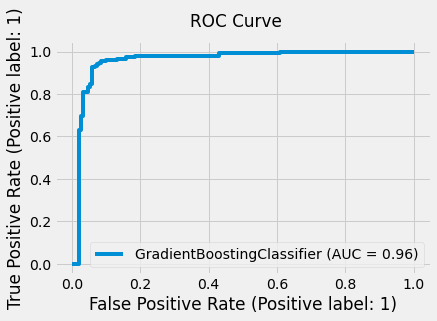

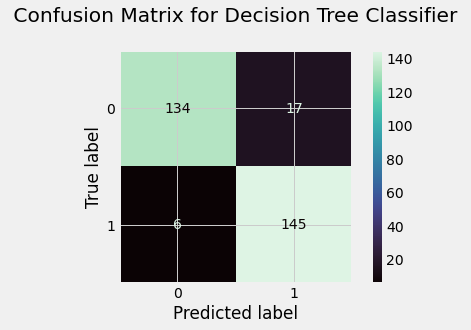

In [127]:
def max_accuracy_score(pipe,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=9,stratify=y)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    y_train_pred =pipe.predict(X_train)
    print('Training accuracy',round(accuracy_score(y_train_pred,y_train),2)*100)
    print('Test Accuracy',round(accuracy_score(y_pred,y_test),2)*100)
    print('cross validation score',cross_val_score(pipe,X,y,scoring='accuracy').mean()*100)
    print('Standard Deviation',cross_val_score(pipe,X,y,scoring='accuracy').std()*100)
    print('Confusion Matrix\n')
    print(confusion_matrix(y_test,y_pred))
    print('Classification Report',classification_report(y_test,y_pred))
    from sklearn import metrics
    plot = metrics.plot_roc_curve(GB, X_test, y_test)
    plot.figure_.suptitle("ROC Curve")
    plt.show()
    metrics.plot_confusion_matrix(GB, X_test, y_test, cmap='mako')
    plt.title(' Confusion Matrix for Decision Tree Classifier \n')
    plt.show()

    
GB=GradientBoostingClassifier(learning_rate=1.5000000000000004,max_features=0.7000000000000002,max_depth=9)
max_accuracy_score(GB,X,y)

We can clearely see that after hyper parameter tuning our accuracy is increased and cros validation score is also increased precission for class 1 is increased

# Saving the model

In [128]:
import pickle
pickle.dump(GB,open("Insurance_claim.pkl","wb"))